In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

SEED = 20
np.random.seed(SEED)

In [ ]:
df = pd.read_csv('/content/aluguel.csv', sep=';')

In [ ]:
df

,cidade,area,quartos,banheiros,vagas_garagem,andar,aceita_animal,mobiliaria,valor_condominio,valor_aluguel,valor_iptu,valor_seguro,valor_total
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,1,0,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,1,0,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,0,0,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10680,Porto Alegre,63,2,1,1,5,0,1,402,1478,24,22,1926
10681,São Paulo,285,4,4,4,17,1,0,3100,15000,973,191,19260
10682,Rio de Janeiro,70,3,3,0,8,0,1,980,6000,332,78,7390
10683,Rio de Janeiro,120,2,2,2,8,1,1,1585,12000,279,155,14020


# **Pré-processamento**


### Checando as informações pra fazermos o pré processamento. Podemos ver que não temos nenhum valor NULL em nossa base de dados


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10685 entries, 0 to 10684
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cidade            10685 non-null  object
 1   area              10685 non-null  int64 
 2   quartos           10685 non-null  int64 
 3   banheiros         10685 non-null  int64 
 4   vagas_garagem     10685 non-null  int64 
 5   andar             10685 non-null  int64 
 6   aceita_animal     10685 non-null  int64 
 7   mobiliaria        10685 non-null  int64 
 8   valor_condominio  10685 non-null  int64 
 9   valor_aluguel     10685 non-null  int64 
 10  valor_iptu        10685 non-null  int64 
 11  valor_seguro      10685 non-null  int64 
 12  valor_total       10685 non-null  int64 
dtypes: int64(12), object(1)
memory usage: 1.1+ MB


### Testaremos um modelo com a variável "area" como entrada e o "valor_aluguel" como alvo. Podemos ver que há uma discrepância muito grande entre valor mínimo e máximo na "area" e no "valor aluguel", que serão nossos alvos para treino, então irei normalizar esses dados mais a frente para podermos ter um melhor desempenho do nosso modelo

In [ ]:
df.describe()

,area,quartos,banheiros,vagas_garagem,andar,aceita_animal,mobiliaria,valor_condominio,valor_aluguel,valor_iptu,valor_seguro,valor_total
count,10685.000000,10685.00000,10685.000000,10685.000000,10685.000000,10685.000000,10685.000000,10685.000000,10685.000000,10685.000000,10685.000000,10685.000000
mean,149.155452,2.50613,2.235751,1.608797,5.043332,0.777913,0.243706,918.745905,3890.416004,335.563032,53.218811,5198.132616
std,537.159483,1.17086,1.406287,1.588426,5.358497,0.415669,0.429338,1166.977706,3381.827918,677.795945,47.350550,4473.376271
min,11.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,3.000000,499.000000
25%,56.000000,2.00000,1.000000,0.000000,1.000000,1.000000,0.000000,170.000000,1530.000000,38.000000,21.000000,2061.000000
50%,90.000000,2.00000,2.000000,1.000000,3.000000,1.000000,0.000000,560.000000,2650.000000,125.000000,36.000000,3578.000000
75%,182.000000,3.00000,3.000000,2.000000,8.000000,1.000000,0.000000,1235.000000,5000.000000,375.000000,68.000000,6758.000000
max,46335.000000,13.00000,10.000000,12.000000,51.000000,1.000000,1.000000,32000.000000,30000.000000,28120.000000,451.000000,32750.000000


### Temos alguns Outliers nessa base de dados, então trataremos eles nas próximas células

<Axes: xlabel='area', ylabel='valor_aluguel'>

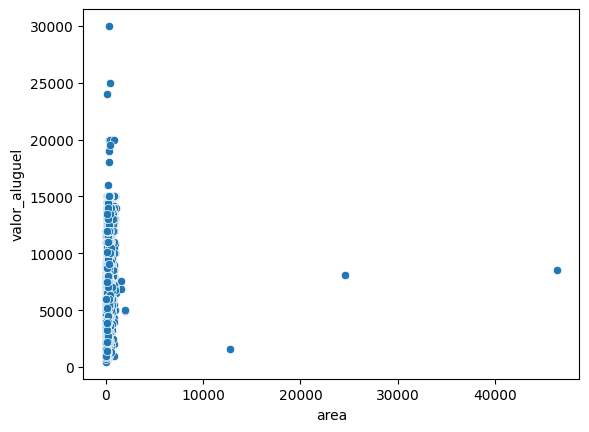

In [ ]:
sns.scatterplot(x = 'area', y = 'valor_aluguel', data=df)

## **Nesta seção, iremos criar nossa lista de OUTLIERS na escala dos nossos dados da coluna "área", ordenando eles acima do percentil 99%, mas determinando uma ordem para cada um**




### Não nos importaremos com OUTLIERS da área no valor mínimo, pois já vimos no .describe() que o menor valor é 11 e estou satisfeito com esse dado

In [ ]:
# Identificar o valor do percentil 99 da area
percent_99_area = df['area'].quantile(0.99)
percent_99_area
# Checando todos os outliers acima do percentil 99
outliers_area = df[df['area'] > percent_99_area]
outliers_area

,cidade,area,quartos,banheiros,vagas_garagem,andar,aceita_animal,mobiliaria,valor_condominio,valor_aluguel,valor_iptu,valor_seguro,valor_total
131,São Paulo,900,4,6,8,0,1,0,0,15000,4417,226,19640
143,Campinas,999,5,7,8,0,1,0,0,14000,667,211,14880
157,São Paulo,660,4,5,5,12,1,1,4800,20000,1750,254,26800
202,São Paulo,750,4,4,6,0,1,0,0,15000,2084,226,17310
306,São Paulo,720,4,6,5,0,1,1,0,12750,2613,192,15560
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10177,São Paulo,1000,4,5,7,5,1,0,8362,6800,4170,87,19420
10363,São Paulo,700,6,6,6,0,1,0,0,8500,1542,128,10170
10373,Campinas,800,4,7,4,0,1,0,2100,15000,1898,226,19220
10444,São Paulo,900,5,5,5,0,0,0,0,15000,3334,226,18560


### Neste exemplo, `np.linspace()` é usado para gerar uma sequência de valores entre `percentile_99 + 1` e `percentile_99 + 10` (ou qualquer intervalo desejado). Esses valores serão usados para substituir os outliers na coluna 'area' do DataFrame. A função `count()` é usada para determinar quantos outliers existem, de modo a garantir que a sequência gerada tenha o mesmo número de valores. Isso garante que os valores substitutos tenham uma ordem entre si e sejam maiores que o percentil 99.

In [ ]:
# Substituindo os outliers por valores um pouco maiores que o percentil 99, mas colocando uma ordem entre eles, para que o ajuste seja fiel ao dado real
outlier_area_replacement_values = list(np.linspace(percent_99_area + 1, percent_99_area + 50, num=df['area'][df['area'] > percent_99_area].count()))
# Verificando se a quantidade de outliers trocados são exatamente iguais ao de outliers contados na célula de cima
len(outlier_area_replacement_values)

106

In [ ]:
# Esse é o nosso array dos outliers ajustados na nossa escala
#df['original_order'] = range(len(df))
#outlier_area_replacement_values

### Substituindo os OUTLIERS da nossa base de dados pelos valores que geramos acima da nossa lista outlier_area_replacement_values.


### Os outliers estão sendo substituídos de acordo com a ordem de sua própria grandeza e da lista dos OUTLIERS na nova escala, para assim, termos uma substituição que faça sentido

In [ ]:
df_sorted = df.sort_values(by='area')
outlier_indices = df_sorted['area'] > percent_99_area

# Substituir os outliers na ordem correta
for i, idx in enumerate(df_sorted.index[outlier_indices]):
    df_sorted.at[idx, 'area'] = outlier_area_replacement_values[i]
print(df_sorted[df_sorted['area'] > percent_99_area])

              cidade        area  quartos  banheiros  vagas_garagem  andar  \
8106       São Paulo  651.000000        7          7              8      0   
7639  Belo Horizonte  651.466667        5          4              6      0   
157        São Paulo  651.933333        4          5              5     12   
7900       São Paulo  652.400000        4          6              4      0   
1960        Campinas  652.866667        5          7              4     17   
...              ...         ...      ...        ...            ...    ...   
8784  Belo Horizonte  698.133333        3          3              2      2   
5126  Belo Horizonte  698.600000        4          2              3      0   
9235        Campinas  699.066667        3          2              0      3   
5912       São Paulo  699.533333        5          4              4     12   
2396  Belo Horizonte  700.000000        4          8              5     11   

      aceita_animal  mobiliaria  valor_condominio  valor_alugue

### Podemos verificar que o ajuste está fiel, pois o nosso maior valor de 40k, que é Belo Horizonte, está com o maior valor de nossa escala

In [ ]:
print(df.at[2396, 'area'])
print(df_sorted.at[2396, 'area'])

46335
700.0


### Retornando a ordenação do nosso data_frame pelo INDEX

In [ ]:
df['area'] = df_sorted['area']

In [ ]:
print(df.at[2396, 'area'])

700.0


## **Nesta seção, iremos criar nossa lista de OUTLIERS na escala dos nossos dados da coluna "aluguel", ordenando eles acima do percentil 99%, mas determinando uma ordem para cada um**
## PS: Não comentarei as células a seguir, pois seguem o mesmo princípio do mecanismo da área




In [ ]:
# Identificar o valor do percentil 99 da area
percent_99_aluguel = df['valor_aluguel'].quantile(0.99)
percent_99_aluguel
# Checando todos os outliers acima do percentil 99
outliers_aluguel = df[df['valor_aluguel'] > percent_99_aluguel]
outliers_aluguel

,cidade,area,quartos,banheiros,vagas_garagem,andar,aceita_animal,mobiliaria,valor_condominio,valor_aluguel,valor_iptu,valor_seguro,valor_total
157,São Paulo,651.933333,4,5,5,12,1,1,4800,20000,1750,254,26800
1253,São Paulo,315.000000,3,5,2,14,0,0,4300,20000,959,254,25510
1743,São Paulo,410.000000,4,5,5,1,1,0,0,20000,0,254,20250
2520,Porto Alegre,318.000000,4,3,0,0,1,0,0,19000,384,338,19720
2618,São Paulo,80.000000,2,1,1,1,1,0,875,24000,0,305,25180
5522,São Paulo,687.866667,3,4,8,0,1,0,0,20000,3813,301,24110
5738,São Paulo,303.000000,3,4,4,1,1,1,4540,18000,0,229,22770
6115,São Paulo,240.000000,4,4,4,5,1,0,2700,16000,1667,203,20570
6182,São Paulo,455.000000,4,5,4,5,1,0,8500,19500,3334,248,31580
6942,São Paulo,486.000000,8,4,6,0,1,0,0,25000,2200,376,27580


In [ ]:
# Substituindo os outliers por valores um pouco maiores que o percentil 99, mas colocando uma ordem entre eles, para que o ajuste seja fiel ao dado real
outlier_aluguel_replacement_values = list(np.linspace(percent_99_aluguel + 1, percent_99_aluguel + 30, num=df['valor_aluguel'][df['valor_aluguel'] > percent_99_aluguel].count()))
# Verificando se a quantidade de outliers trocados são exatamente iguais ao de outliers contados na célula de cima
len(outlier_aluguel_replacement_values)

11

In [ ]:
# Esse é o nosso array dos outliers ajustados na nossa escala
outlier_aluguel_replacement_values

[15001.0,
 15003.9,
 15006.8,
 15009.7,
 15012.6,
 15015.5,
 15018.4,
 15021.3,
 15024.2,
 15027.1,
 15030.0]

In [ ]:
df_sorted = df.sort_values(by='valor_aluguel')
outlier_indices = df_sorted['valor_aluguel'] > percent_99_aluguel

# Substituir os outliers na ordem correta
for i, idx in enumerate(df_sorted.index[outlier_indices]):
    df_sorted.at[idx, 'valor_aluguel'] = outlier_aluguel_replacement_values[i]
print(df_sorted[df_sorted['valor_aluguel'] > percent_99_aluguel])

            cidade        area  quartos  banheiros  vagas_garagem  andar  \
6115     São Paulo  240.000000        4          4              4      5   
5738     São Paulo  303.000000        3          4              4      1   
2520  Porto Alegre  318.000000        4          3              0      0   
6182     São Paulo  455.000000        4          5              4      5   
1743     São Paulo  410.000000        4          5              5      1   
1253     São Paulo  315.000000        3          5              2     14   
157      São Paulo  651.933333        4          5              5     12   
5522     São Paulo  687.866667        3          4              8      0   
2618     São Paulo   80.000000        2          1              1      1   
6942     São Paulo  486.000000        8          4              6      0   
7742     São Paulo  350.000000        3          3              3      0   

      aceita_animal  mobiliaria  valor_condominio  valor_aluguel  valor_iptu  \
6115   

In [ ]:
df['valor_aluguel'] = df_sorted['valor_aluguel']
df.head()

,cidade,area,quartos,banheiros,vagas_garagem,andar,aceita_animal,mobiliaria,valor_condominio,valor_aluguel,valor_iptu,valor_seguro,valor_total
0,São Paulo,70.0,2,1,1,7,1,1,2065,3300.0,211,42,5618
1,São Paulo,320.0,4,4,0,20,1,0,1200,4960.0,1750,63,7973
2,Porto Alegre,80.0,1,1,1,6,1,0,1000,2800.0,0,41,3841
3,Porto Alegre,51.0,2,1,0,2,1,0,270,1112.0,22,17,1421
4,São Paulo,25.0,1,1,0,1,0,0,0,800.0,25,11,836


### Olhando nosso gráfico após as transformações

<Axes: xlabel='area', ylabel='valor_aluguel'>

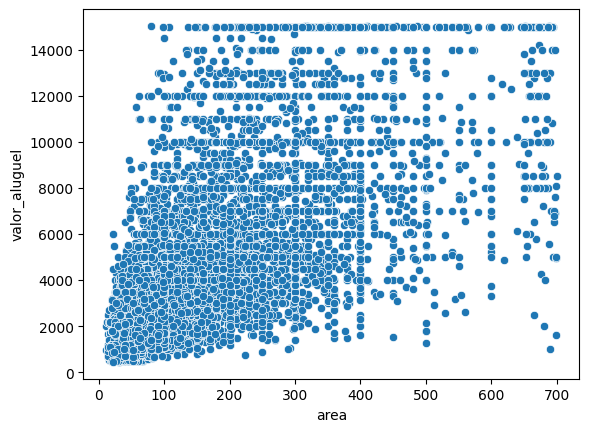

In [ ]:
sns.scatterplot(x = 'area', y = 'valor_aluguel', data=df)

## Normalizando os dados para que o modelo possa compreender melhor a distribuição e não seja influenciado pelas grandezas entre 11 - 700. Se colocarmos em uma escala entre 0 e 1, o modelo terá mais facilidade para compreender a distribuição

In [ ]:
df_norm = df.copy()
# Pegando as colunas que desejamos normalizar
columns_to_normalize = ['area', 'valor_aluguel','quartos']

# Instanciando o nosso MinMaxScaler
scaler = MinMaxScaler()

# Normalizando as colunas que desejamos
df_norm[columns_to_normalize] = scaler.fit_transform(df_norm[columns_to_normalize])

df_norm['area'].head()

0    0.085631
1    0.448476
2    0.100145
3    0.058055
4    0.020319
Name: area, dtype: float64

In [ ]:
df_norm['valor_aluguel'].head()

0    0.195473
1    0.309328
2    0.161180
3    0.045405
4    0.024005
Name: valor_aluguel, dtype: float64

<Axes: xlabel='area', ylabel='valor_aluguel'>

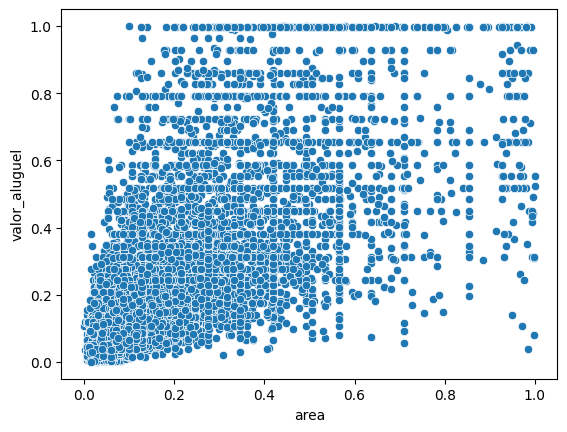

In [55]:
sns.scatterplot(x = 'area', y = 'valor_aluguel', data=df_norm)

In [ ]:
X = df_norm['area']
y = df_norm['valor_aluguel']

In [ ]:
X

0        0.085631
1        0.448476
2        0.100145
3        0.058055
4        0.020319
           ...   
10680    0.075472
10681    0.397678
10682    0.085631
10683    0.158200
10684    0.100145
Name: area, Length: 10685, dtype: float64

In [ ]:
y

0        0.195473
1        0.309328
2        0.161180
3        0.045405
4        0.024005
           ...   
10680    0.070508
10681    0.997942
10682    0.380658
10683    0.792181
10684    0.065158
Name: valor_aluguel, Length: 10685, dtype: float64

# **Dividindo o conjunto de dados em treino / teste e efetuando o treinamento do modelo**

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X , y , test_size = 0.25)

In [ ]:
X_train = X_train.to_numpy()
X_train = X_train.reshape(-1,1)

In [ ]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("Intercepto:", regression.intercept_)
print("Coeficiente de inclinação:", regression.coef_)

Intercepto: 0.07228948666199114
Coeficiente de inclinação: [0.88046995]


In [ ]:
X_test = X_test.to_numpy()
X_test = X_test.reshape(-1,1)

In [ ]:
y_hat = regression.predict(X_test)

## Checando nossa métrica de MSE e plotando uma reta no gráfico para ver o aprendizado do modelo

In [ ]:
mse = mean_squared_error(y_test, y_hat)
print('MSE : {}'.format(round(mse, 4)))

MSE : 0.025


### Tivemos um MSE muito próximo de 0, poderíamos afirmar que o modelo realmente aprendeu com os dados?

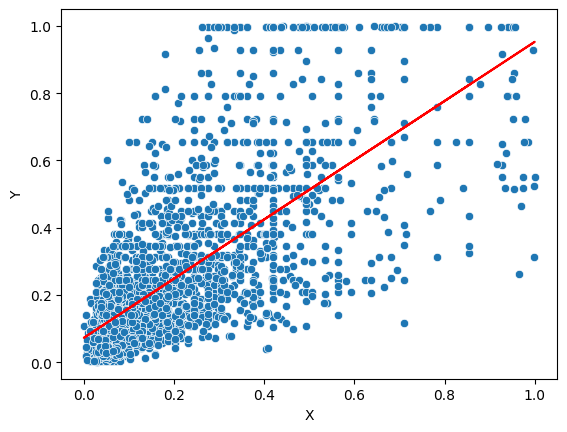

In [ ]:
sns.scatterplot(x=X_test.flatten(), y=y_test)

plt.plot(X_test.flatten(), y_hat, color='red')

plt.xlabel('X')
plt.ylabel('Y')

plt.show()

## Iremos incluir 2 novas variáveis ("Mobiliado" e "Número de quartos") e ver as alterações no aprendizado do modelo

### Começaremos adicionando as variáveis quartos e ver o resultado no MSE

### Plotando o input de quartos para ver a distribuição dos dados

<Axes: xlabel='quartos', ylabel='valor_aluguel'>

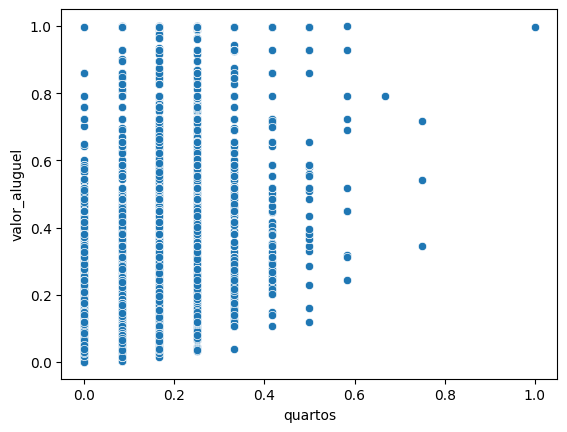

In [49]:
sns.scatterplot(x = 'quartos', y = 'valor_aluguel', data=df_norm)

# Plotando o input de mobília para ver a distribuição dos dados

<Axes: xlabel='mobiliaria', ylabel='valor_aluguel'>

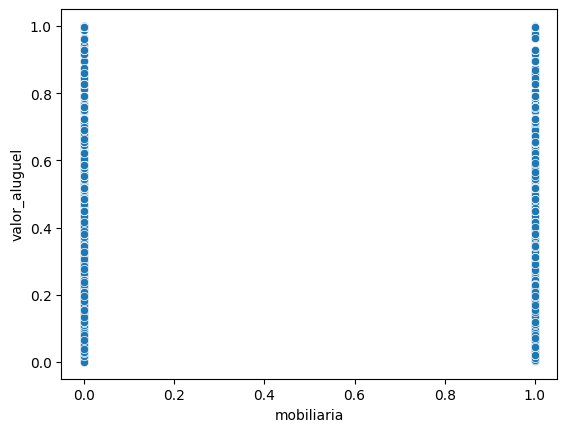

In [53]:
sns.scatterplot(x = 'mobiliaria', y = 'valor_aluguel', data=df_norm)

<Axes: xlabel='area', ylabel='valor_aluguel'>

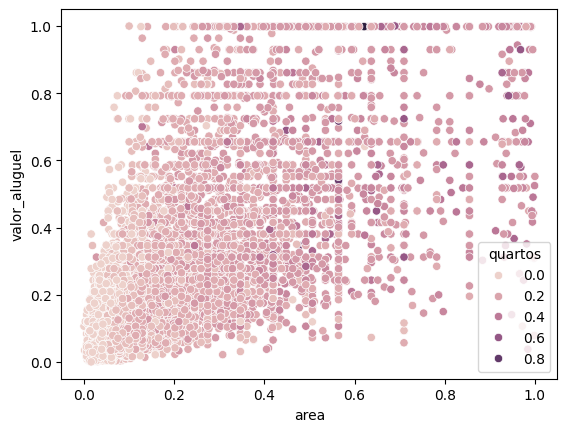

In [58]:
sns.scatterplot(x = 'area', y = 'valor_aluguel', data=df_norm, hue='quartos')

### Podemos ver que a área tem forte influência sobre o valor do aluguel, entretanto, é interessante notar que a maior concentração de mobiliarias positivas está no começo do gráfico, ou seja, temos uma área pequena. Porém, mesmo tendo uma área pequena, os valores dos alugéis estão mais altos que os outros daquela mesma região. Podemos, então, afirmar que: Mesmo que a área seja pequena, se o apto tiver mobília, o preço será mais alto que os outros?

<Axes: xlabel='area', ylabel='valor_aluguel'>

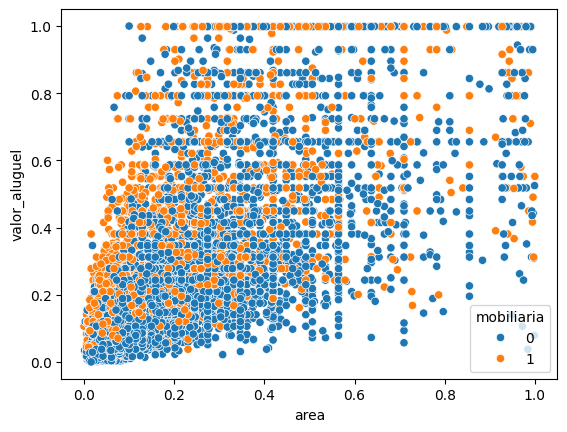

In [59]:
sns.scatterplot(x = 'area', y = 'valor_aluguel', data=df_norm, hue='mobiliaria')

In [ ]:
X_quarto = df_norm[['area', 'quartos']]
y_quarto = df_norm['valor_aluguel']

In [ ]:
X_quarto_train, X_quarto_test , y_quarto_train, y_quarto_test = train_test_split(X_quarto , y_quarto , test_size = 0.25)

In [ ]:
reg_quarto = LinearRegression()
reg_quarto.fit(X_quarto_train, y_quarto_train)

LinearRegression()

In [ ]:
print("Intercepto:", reg_quarto.intercept_)
print("Coeficiente de inclinação:", reg_quarto.coef_)

Intercepto: 0.05828281236194091
Coeficiente de inclinação: [0.80109452 0.21822384]


In [ ]:
y_quarto_hat = reg_quarto.predict(X_quarto_test)

### Não houve alterações no aprendizado do nosso algoritmo

In [ ]:
mse_quarto = mean_squared_error(y_quarto_test, y_quarto_hat)
print('MSE com a variável quarto : {}'.format(round(mse_quarto, 4)))

MSE com a variável quarto : 0.028


### Adicionaremos a variável mobília agora

In [ ]:
X_mobilia = df_norm[['area', 'quartos', 'mobiliaria']]
y_mobilia = df_norm['valor_aluguel']

In [ ]:
X_mobilia_train, X_mobilia_test , y_mobilia_train, y_mobilia_test = train_test_split(X_mobilia , y_mobilia , test_size = 0.25)

In [ ]:
reg_mobilia = LinearRegression()
reg_mobilia.fit(X_mobilia_train, y_mobilia_train)

LinearRegression()

In [ ]:
print("Intercepto:", reg_mobilia.intercept_)
print("Coeficiente de inclinação:", reg_mobilia.coef_)

Intercepto: 0.03257865089999579
Coeficiente de inclinação: [0.74997386 0.30406106 0.09971755]


In [ ]:
y_mobilia_hat = reg_mobilia.predict(X_mobilia_test)

In [ ]:
mse_mobilia = mean_squared_error(y_mobilia_test, y_mobilia_hat)
print('MSE com a variável mobília e o quarto : {}'.format(round(mse_mobilia, 4)))

MSE com a variável mobília e o quarto : 0.0252


# Conclusão: Não houve alterações no modelo ao adicionar as 2 variáveis (mobília e quartos). Pode até ser que elas tenham algum impacto no aprendizado do modelo, mas a variável "área" do nosso primeiro modelo é predominantemente mais impactante que as outras, pois mesmo adicionando outras 2 features, não houve mudanças significativas em nosso MSE

# Testando o modelo KNN

## Testando o modelo com uma única variável

In [ ]:
eqm_lst = []
eqm_min = []
eqm = 100

# Percorrendo a lista K
for i in range(50):
  # Temos que ter essa condição i != 0, pois se de alguma maneira ele iterar o 0, o código quebra
  if i != 0:
    # Atribuindo o parâmetro de vizinhos pelo i, que é quem está iterando a nossa lista K
    knn = KNeighborsRegressor(i)
    knn.fit(X_train,y_train)
    y_hat = knn.predict(X_test)
    eqm = mean_squared_error(y_test , y_hat)
    # Caso queira verificar todos os EQM, temos uma lista com todos
    eqm_lst.append(eqm)
    # Verificando se é o 1° valor da lista K, pois se for, não temos como comparar nada, apenas adicionar o valor
    # Estamos comparando se o EQM atual, ou seja, do I atual, é menor do que o EQM que temos na nossa lista de eqm_min, se ele for menor, substituímos
    if eqm < eqm_min[0]:
      # Aqui é a nossa lista do MENOR EQM e do respectivo VIZINHO, ou seja, o valor da lista K que nos retornou o MENOR EQM
      eqm_min[0] = eqm
      eqm_min[1] = i
  else:
    # Estamos adicionando o EQM e além disso, já estamos adicionando o valor de K no mesmo array, então nós temos o menor valor e o respectivo "vizinho"
    eqm_min.append(eqm)
    eqm_min.append(i)
    # Caso ele não seja o primeiro elemento, então temos que comparar para saber se o EQM encontrado é o menor

print(f'O menor erro encontrado na lista K foi {eqm_min[0]:.4f} e o valor de K foi {eqm_min[1]}')

O menor erro encontrado na lista K foi 0.0243 e o valor de K foi 49


## Testando com 2 variáveis (área e quarto)

In [ ]:
eqm_lst = []
eqm_min = []
eqm = 100

# Percorrendo a lista K
for i in range(50):
  # Temos que ter essa condição i != 0, pois se de alguma maneira ele iterar o 0, o código quebra
  if i != 0:
    # Atribuindo o parâmetro de vizinhos pelo i, que é quem está iterando a nossa lista K
    knn = KNeighborsRegressor(i)
    knn.fit(X_quarto_train,y_quarto_train)
    y_hat = knn.predict(X_quarto_test)
    eqm = mean_squared_error(y_quarto_test , y_hat)
    # Caso queira verificar todos os EQM, temos uma lista com todos
    eqm_lst.append(eqm)
    # Verificando se é o 1° valor da lista K, pois se for, não temos como comparar nada, apenas adicionar o valor
    # Estamos comparando se o EQM atual, ou seja, do I atual, é menor do que o EQM que temos na nossa lista de eqm_min, se ele for menor, substituímos
    if eqm < eqm_min[0]:
      # Aqui é a nossa lista do MENOR EQM e do respectivo VIZINHO, ou seja, o valor da lista K que nos retornou o MENOR EQM
      eqm_min[0] = eqm
      eqm_min[1] = i
  else:
    # Estamos adicionando o EQM e além disso, já estamos adicionando o valor de K no mesmo array, então nós temos o menor valor e o respectivo "vizinho"
    eqm_min.append(eqm)
    eqm_min.append(i)
    # Caso ele não seja o primeiro elemento, então temos que comparar para saber se o EQM encontrado é o menor

print(f'O menor erro encontrado na lista K foi {eqm_min[0]:.4f} e o valor de K foi {eqm_min[1]}')

O menor erro encontrado na lista K foi 0.0260 e o valor de K foi 48


## Testando com 3 variáveis (área, quarto e mobília)

In [ ]:
eqm_lst = []
eqm_min = []
eqm = 100

# Percorrendo a lista K
for i in range(50):
  # Temos que ter essa condição i != 0, pois se de alguma maneira ele iterar o 0, o código quebra
  if i != 0:
    # Atribuindo o parâmetro de vizinhos pelo i, que é quem está iterando a nossa lista K
    knn = KNeighborsRegressor(i)
    knn.fit(X_mobilia_train,y_mobilia_train)
    y_hat = knn.predict(X_mobilia_test)
    eqm = mean_squared_error(y_mobilia_test , y_hat)
    # Caso queira verificar todos os EQM, temos uma lista com todos
    eqm_lst.append(eqm)
    # Verificando se é o 1° valor da lista K, pois se for, não temos como comparar nada, apenas adicionar o valor
    # Estamos comparando se o EQM atual, ou seja, do I atual, é menor do que o EQM que temos na nossa lista de eqm_min, se ele for menor, substituímos
    if eqm < eqm_min[0]:
      # Aqui é a nossa lista do MENOR EQM e do respectivo VIZINHO, ou seja, o valor da lista K que nos retornou o MENOR EQM
      eqm_min[0] = eqm
      eqm_min[1] = i
  else:
    # Estamos adicionando o EQM e além disso, já estamos adicionando o valor de K no mesmo array, então nós temos o menor valor e o respectivo "vizinho"
    eqm_min.append(eqm)
    eqm_min.append(i)
    # Caso ele não seja o primeiro elemento, então temos que comparar para saber se o EQM encontrado é o menor

print(f'O menor erro encontrado na lista K foi {eqm_min[0]:.4f} e o valor de K foi {eqm_min[1]}')

O menor erro encontrado na lista K foi 0.0240 e o valor de K foi 35


# Conclusão 2: Mesmo adicionando outras variáveis no nosso modelo KNN, o resultado não mudou, da mesma maneira como ocorreu em nosso primeiro modelo. O que mostra ainda mais que a nossa variável "área" é realmente a mais impactante no aprendizado do nosso modelo dentre as 3